# Text Analysis
---
## Overview
- Loaded  in only a subset of the clean data (n=100,000) and only columns needed for NLP
- Balanced out the classes of reviews; recommended and not recommended products 
- Conducted  initial EDA, word count and length distribution in review text for each class
- Preprocessing data for additional NLP EDA, used regex to remove special characters , stemmed and lemmatized review text
- Used count vectorizer to check out most frequent bigrams for each class
- Performed Sentimental analysis on all reviews and reviews for each class.


## Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

## Load in data

In [2]:
# Load in datawork w/ subset of data to decrease running time
df = pd.read_csv('../data/Clean-ALL_reviews.csv',lineterminator='\n', low_memory=False,
                 usecols = ['review_text', 'is_recommended', 'brand_name','product_name','rating']).sample(n=100000)

In [3]:
# Balance out value counts for 'is_recommended' for our analysis
df = pd.concat([df.loc[df['is_recommended'] == 1].sample(df['is_recommended'].value_counts().min()), df.loc[df['is_recommended'] == 0]])
# Check
df['is_recommended'].value_counts()

1    15951
0    15951
Name: is_recommended, dtype: int64

## NLP EDA

### Word Count and Length Distribution in Review text

In [4]:
# Create two columns to visualize the length and word count of the reviews
df['word_count'] = df['review_text'].apply(lambda x: len(x.split()))
df['length'] = df['review_text'].apply(len)

In [5]:
# Separate data by products that are recommended and not recommended
rec = df[df['is_recommended'] == 1]
not_rec = df[df['is_recommended'] == 0]

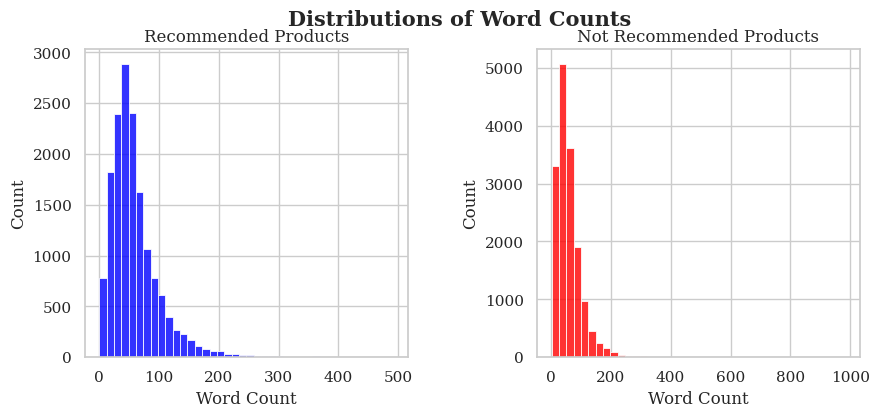

In [7]:
# Compare word counts in reviews by plotting word count distributions
fig, ax =  plt.subplots(1, 2, figsize=(10,4))

sns.histplot(rec['word_count'], ax=ax[0], bins=40,  color = 'blue', alpha = 0.8)
sns.histplot(not_rec['word_count'], ax=ax[1], bins=40,  color = 'red', alpha = 0.8, )
ax[0].set(xlabel= 'Word Count', title = 'Recommended Products' )
ax[1].set(xlabel='Word Count', title = 'Not Recommended Products')

# Set theme of graphs
# Code information from https://matplotlib.org/stable/tutorials/text/text_props.html
plt.subplots_adjust(hspace=5)
plt.subplots_adjust(wspace=0.4)
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'serif'
fig.suptitle('Distributions of Word Counts', fontsize=15, fontweight='bold');

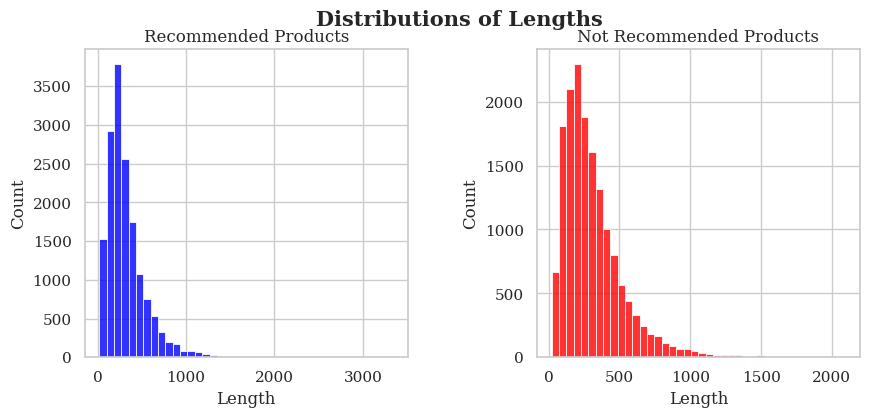

In [9]:
# Graph the length of the reviews text
fig, ax =  plt.subplots(1, 2, figsize=(10,4))

sns.histplot(rec['length'], ax=ax[0], bins=40,  color = 'blue', alpha = 0.8)
sns.histplot(not_rec['length'], ax=ax[1], bins=40,  color = 'red', alpha = 0.8)
ax[0].set(xlabel= 'Length', title = 'Recommended Products')
ax[1].set(xlabel='Length', title = 'Not Recommended Products')

plt.subplots_adjust(hspace=0.9)
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Distributions of Lengths', fontsize=15, fontweight='bold');

Distribution Plot Interpretion:
- Based on the plots shown above, it becomes apparent that the not recommended products receive longer reviews which most likely are negative. Users who have a negative experience or dissatisfaction generally leave lengthier reviews talking about their experience in detail. Although there are cases where recommended products have longer reviews, it is generally observed that non-recommended products tend to have longer reviews overall.

## Preprocessing

In [8]:
# Create a function that cleans the text using regex
def clean_text(text):
    text = re.sub("[^a-zA-Z0-9 ]", "", text)
    return text

In [9]:
# Apply function to text
df['review_text'] = df['review_text'].apply(clean_text)

In [10]:
# Stem review text
stem = PorterStemmer()
df['review_text'] = [stem.stem(i) for i in df['review_text']]

# Lemmatize review text
lem = WordNetLemmatizer()
df['review_text'] = [lem.lemmatize(i) for i in df['review_text']]

In [11]:
# Take a look
df['review_text']

170386     been using this moisturizer for about 2 years ...
687325     wish i didnt love this product as much as i do...
713134     such a good product for my skin dont have to u...
938795     it get spoilt very soon first it was very good...
533799     i cleansed my skin right before bed and applie...
                                 ...                        
177812     this is just ok works decently well but i dont...
145491     this product feels good under the eyes simply ...
172136     it did ok i mean it helped a bit with moisturi...
1002124    these are tasty i cant speak to any skinrelate...
145970     not my favorite mask i receive this as a free ...
Name: review_text, Length: 31902, dtype: object

In [12]:
# Add custom stop words to english stop words
my_stop_words = ['product', 'skin', 'best', 'like', 'make', 'get', 'help','face','use',
                'love','using','really','feel','feels','would','also','it', 'even','used',
                'good','great','made','one','much','well','skincare','received','free','full',
                'size', 'recommend']


stop = stopwords.words("english")
stop1 = stop + my_stop_words

## Bigrams Anaylsis

In [13]:
# Instantiate CountVectorizer 
cv = CountVectorizer(stop_words=stop1, ngram_range=(2,2))

In [14]:
# Fit and transform CountVectorizer on recommended and not recommended 
# Code inspired from my project 3 NLP 

rec_vect = cv.fit_transform(rec['review_text'])
rec_vect_df = pd.DataFrame(rec_vect.todense(), columns=cv.get_feature_names_out())

not_rec_vect = cv.fit_transform(not_rec['review_text'])
not_rec_vect_df = pd.DataFrame(not_rec_vect.todense(), columns=cv.get_feature_names_out())

In [17]:
# Take a look at the top 15 words for recommended products
rec_vect_df.sum().sort_values(ascending=False).head(15)

long way            670
goes long           644
eye cream           617
little goes         521
fine lines          492
acne prone          446
leaves feeling      437
honest review       354
first time          298
little bit          294
dark spots          283
exchange honest     273
testing purposes    258
lip balm            256
dark circles        252
dtype: int64

In [15]:
# Take a look at the top 15 words for not recommended products
not_rec_vect_df.sum().sort_values(ascending=False).head(15)

eye cream            429
acne prone           421
excited try          412
waste money          328
see difference       299
price point          275
worth price          270
dark circles         263
fine lines           262
notice difference    259
lip balm             244
got sample           237
high hopes           233
every time           214
first time           211
dtype: int64

### Observations


**Recommended Products:**

- *'long way', 'little bit', and 'goes long'*: These phrases suggest that users are satisfied with these recommended products because a small amount of the product goes a long way, resulting in long-lasting usage or high concentration.

- *'acne prone', 'dark circles', and 'fine lines'*: These phrases indicate that users appreciate products that effectively address their specific skin concerns related to acne-prone skin, dark circles, and fine lines.

- *'leaves feeling'*: Users experience a positive sensation or noticeable effect on their skin after using these recommended products.

- *'long time' and 'first time'*: Users who have been using these products for an extended period of time express satisfaction, while those who tried them for the first time had a positive initial impression.

- *'every night'*: This phrase suggests that users incorporate these recommended products into their regular skincare routine, using them consistently on a nightly basis.

**Not Recommended Products:**

- *'notice difference' and 'see difference'*: These phrases indicate that users had expectations of seeing positive changes in their skin after using the product, but didn't get the outcome they expected.

- *'price point' and 'high hopes'*: Users may have had high expectations for these products based on their perceived price point or reputation, but the products did not meet those expectations, which led disappointment.

- *'waste money' and 'worth price'*: These phrases suggest that users felt the not recommended products did not provide sufficient value for their cost, implying a lack of satisfaction with the product's performance relative to its price. It also indicates that users believe there are other similar products available in the market that can achieve the desired results at a lower price point.

- *'honest review'*: Users provided sincere feedback or opinions about their experiences with these not recommended products, expressing their dissatisfaction or disappointment.

## Sentimental Analysis

In [16]:
# Instantiate sentiment intensity analyzer
sent = SentimentIntensityAnalyzer()

# Create a sentiment col with sentiment scores
for i, text in enumerate(df['review_text']):
    sentiment = sent.polarity_scores(text)
    df.at[i, 'sentiment'] = sentiment['compound']

In [17]:
# Convert numeric values into categorical values for plotting
for i, score in enumerate(df['sentiment']):
    if score == 0:
        df.at[i, 'sentiment'] = 'neutral'
    elif score > 0:
        df.at[i, 'sentiment'] = 'positive'
    else:
        df.at[i, 'sentiment'] = 'negative'

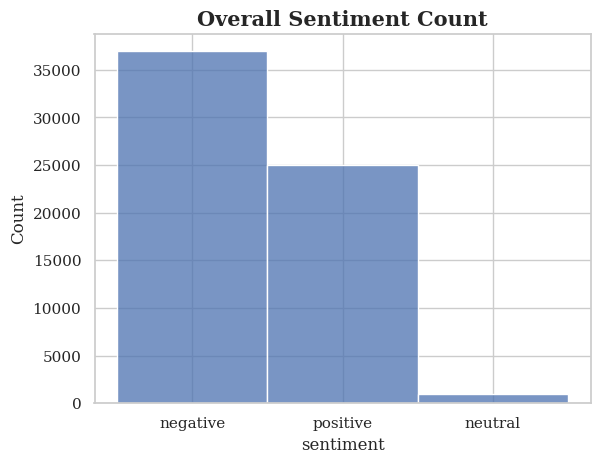

In [18]:
# Overall sentiment anaylsis of data
sns.histplot(data = df['sentiment'])
plt.title('Overall Sentiment Count', size =15, fontweight='semibold');

Overall Sentiment Plot Interpretation:
- The model classified the majority of the posts as having negative sentiment. A smaller proportion of the posts were categorized as positive sentiment, and a very low percentage fell under the neutral sentiment category.

In [19]:
# Separate data again
rec = df.loc[df['is_recommended']== 1]
not_rec = df.loc[df['is_recommended']== 0]

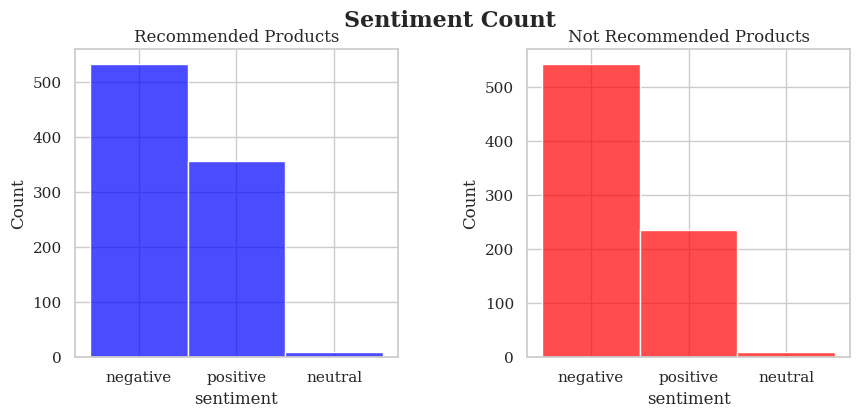

In [20]:
# Plot sentiment count for each product that is recommended/not recommended
fig, ax =  plt.subplots(1, 2, figsize=(10,4))

sns.histplot(rec['sentiment'], ax=ax[0], bins=40,  color = 'blue', alpha = 0.7)
sns.histplot(not_rec['sentiment'], ax=ax[1], bins=40,  color = 'red', alpha = 0.7)
ax[0].set(title = 'Recommended Products')
ax[1].set(title = 'Not Recommended Products')

plt.subplots_adjust(hspace=0.9)
plt.subplots_adjust(wspace=0.4)
fig.suptitle("Sentiment Count", fontsize=16, fontweight='semibold');

Sentiment Plots Interpretation:
- It is interesting to observe that the sentiment analysis for recommended product reviews predominantly yielded negative sentiment. Surprisingly, the model classified a higher number of negative posts for recommended products compared to not recommended products. However, recommended products did display a slightly higher proportion of positive sentiment reviews. 